# Data Scientist Professional Practical Exam Submission

**Use this template to write up your summary for submission. Code in Python or R needs to be included.**


## 📝 Task List

Your written report should include both code, output and written text summaries of the following:
- Data Validation:   
  - Describe validation and cleaning steps for every column in the data 
- Exploratory Analysis:  
  - Include two different graphics showing single variables only to demonstrate the characteristics of data  
  - Include at least one graphic showing two or more variables to represent the relationship between features
  - Describe your findings
- Model Development
  - Include your reasons for selecting the models you use as well as a statement of the problem type
  - Code to fit the baseline and comparison models
- Model Evaluation
  - Describe the performance of the two models based on an appropriate metric
- Business Metrics
  - Define a way to compare your model performance to the business
  - Describe how your models perform using this approach
- Final summary including recommendations that the business should undertake

*Start writing report here..*

In [261]:
# Importing Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
plt.style.use('ggplot')
import missingno as msno
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import PowerTransformer
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder
from sklearn.compose import ColumnTransformer


## ✅ When you have finished...
-  Publish your Workspace using the option on the left
-  Check the published version of your report:
	-  Can you see everything you want us to grade?
    -  Are all the graphics visible?
-  Review the grading rubric. Have you included everything that will be graded?
-  Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your practical exam report and record your presentation

In [262]:
# Read CSV 
recipe_site_traffic = pd.read_csv("recipe_site_traffic_2212.csv")
recipe_site_traffic

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,1,NaN,NaN,NaN,NaN,Pork,6,High
1,2,35.48,38.56,0.66,0.92,Potato,4,High
2,3,914.28,42.68,3.09,2.88,Breakfast,1,NaN
3,4,97.03,30.56,38.63,0.02,Beverages,4,High
4,5,27.05,1.85,0.80,0.53,Beverages,4,NaN
...,...,...,...,...,...,...,...,...
942,943,1161.00,5.31,22.39,44.22,Lunch/Snacks,2,NaN
943,944,NaN,NaN,NaN,NaN,Potato,2,High
944,945,951.74,29.42,3.57,13.87,Pork,2,High
945,946,266.61,35.77,0.97,8.07,Potato,6,High


In [263]:
# Check how many total rows and columns
recipe_site_traffic.shape

(947, 8)

In [264]:
# Check for all non-null values and verifying data types
recipe_site_traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   recipe        947 non-null    int64  
 1   calories      895 non-null    float64
 2   carbohydrate  895 non-null    float64
 3   sugar         895 non-null    float64
 4   protein       895 non-null    float64
 5   category      947 non-null    object 
 6   servings      947 non-null    object 
 7   high_traffic  574 non-null    object 
dtypes: float64(4), int64(1), object(3)
memory usage: 59.3+ KB


In [265]:
# Check for duplicates
duplicates = recipe_site_traffic[recipe_site_traffic.duplicated(keep=False)]
original_and_duplicates = recipe_site_traffic[recipe_site_traffic.isin(duplicates.to_dict(orient='list')).all(axis=1)]
print(original_and_duplicates)

Empty DataFrame
Columns: [recipe, calories, carbohydrate, sugar, protein, category, servings, high_traffic]
Index: []


No duplicates

In [266]:
# Check columns for any missing values
recipe_site_traffic.isna().sum()

recipe            0
calories         52
carbohydrate     52
sugar            52
protein          52
category          0
servings          0
high_traffic    373
dtype: int64

There are currently 52 null values in the 4 columns: 'calories', 'carbohydrate', 'sugar', and 'protein'; and 373 null values in the 'high_traffic' column

In [267]:
# Verify unique values in 'recipe' column
recipe_site_traffic['recipe'].value_counts()

1      1
637    1
625    1
626    1
627    1
      ..
320    1
321    1
322    1
323    1
947    1
Name: recipe, Length: 947, dtype: int64

In [268]:
# Verify that all values in the 'recipe' column are unique, no duplicates
unique_values_count = recipe_site_traffic['recipe'].nunique()
print(f"Number of unique values in 'recipe' column: {unique_values_count}")

Number of unique values in 'recipe' column: 947


In [269]:
# Verify unique values in 'servings' column
recipe_site_traffic['servings'].value_counts()

4               389
6               197
2               183
1               175
4 as a snack      2
6 as a snack      1
Name: servings, dtype: int64

In [270]:
# Replace "4 as a snack" with "4" and "6 as a snack" with "6" in the 'servings' column
recipe_site_traffic['servings'].replace({'4 as a snack': '4', '6 as a snack': '6'}, inplace=True)

# Recount the values in the 'servings' column
updated_servings_counts = recipe_site_traffic['servings'].value_counts()
updated_servings_counts

4    391
6    198
2    183
1    175
Name: servings, dtype: int64

In [271]:
# Verify unique values in 'category' column
recipe_site_traffic['category'].value_counts()

Breakfast         106
Chicken Breast     98
Beverages          92
Lunch/Snacks       89
Potato             88
Pork               84
Vegetable          83
Dessert            83
Meat               79
Chicken            74
One Dish Meal      71
Name: category, dtype: int64

11 categories appear. It's worth noting that there's an additional category 'Chicken Breast' which was not listed in the expected 10 categories. This category was retained in the dataset, as its exclusion could significantly impact the predictive accuracy and comprehensiveness of the data. Including 'Chicken Breast' allows for a more robust analysis, potentially capturing trends and preferences that might otherwise be missed."

In [272]:
# Verify unique values in 'high_traffic' column
recipe_site_traffic['high_traffic'].value_counts()

High    574
Name: high_traffic, dtype: int64

In [273]:
# Count missing values in the 'high_traffic' column
missing_values_count = recipe_site_traffic['high_traffic'].isna().sum()

# Print the number of missing values
print(f"Number of missing values in 'high_traffic': {missing_values_count}")

Number of missing values in 'high_traffic': 373


In [274]:
# Replace the rows with value "High" with True, and null values with False
recipe_site_traffic['high_traffic'] = np.where(recipe_site_traffic['high_traffic'] == "High", True, False)

# Check the values of high_traffic column again
recipe_site_traffic['high_traffic'].value_counts()

True     574
False    373
Name: high_traffic, dtype: int64

In [275]:
# Update category types for columns: 'category' and ''servings'
recipe_site_traffic['category'] = recipe_site_traffic['category'].astype('category')
recipe_site_traffic['servings'] = recipe_site_traffic['servings'].astype('Int64')
recipe_site_traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   recipe        947 non-null    int64   
 1   calories      895 non-null    float64 
 2   carbohydrate  895 non-null    float64 
 3   sugar         895 non-null    float64 
 4   protein       895 non-null    float64 
 5   category      947 non-null    category
 6   servings      947 non-null    Int64   
 7   high_traffic  947 non-null    bool    
dtypes: Int64(1), bool(1), category(1), float64(4), int64(1)
memory usage: 47.7 KB


After analyzing the data types, it would make it easier to update the 'category' column to category and the 'servings' column to Int64. The 'high_traffic' column defaults to bool because I replaced the value "High" with True, and null values with False.

In [276]:
# Update on missing values in columns
recipe_site_traffic.isna().sum()

recipe           0
calories        52
carbohydrate    52
sugar           52
protein         52
category         0
servings         0
high_traffic     0
dtype: int64

Still shows missing values in all 4 columns: 'calories', 'carbohydrate', 'sugar', and 'protein'.

In [277]:
# Removing missing values from all columns
recipe_site_traffic.dropna(inplace=True)
recipe_site_traffic

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
1,2,35.48,38.56,0.66,0.92,Potato,4,True
2,3,914.28,42.68,3.09,2.88,Breakfast,1,False
3,4,97.03,30.56,38.63,0.02,Beverages,4,True
4,5,27.05,1.85,0.80,0.53,Beverages,4,False
5,6,691.15,3.46,1.65,53.93,One Dish Meal,2,True
...,...,...,...,...,...,...,...,...
941,942,186.21,83.94,1.98,22.40,Chicken Breast,4,True
942,943,1161.00,5.31,22.39,44.22,Lunch/Snacks,2,False
944,945,951.74,29.42,3.57,13.87,Pork,2,True
945,946,266.61,35.77,0.97,8.07,Potato,6,True


In [278]:
# Check that the rows are all matching to avoid issues in null values and blank spaces
recipe_site_traffic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 895 entries, 1 to 946
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   recipe        895 non-null    int64   
 1   calories      895 non-null    float64 
 2   carbohydrate  895 non-null    float64 
 3   sugar         895 non-null    float64 
 4   protein       895 non-null    float64 
 5   category      895 non-null    category
 6   servings      895 non-null    Int64   
 7   high_traffic  895 non-null    bool    
dtypes: Int64(1), bool(1), category(1), float64(4), int64(1)
memory usage: 84.2 KB


All rows are now 895 for each of the 8 columns.

In [279]:
# Double check for duplicates
print(original_and_duplicates)

Empty DataFrame
Columns: [recipe, calories, carbohydrate, sugar, protein, category, servings, high_traffic]
Index: []


No duplicates

In [280]:
# Double checking that there are no missing values
recipe_site_traffic.isna().sum()

recipe          0
calories        0
carbohydrate    0
sugar           0
protein         0
category        0
servings        0
high_traffic    0
dtype: int64

There are no missing values

## Data Validation Summary

Describe validation and cleaning steps for every column in the data within all 947 rows and 8 columns within the dataset:

Recipe: This column serves as a unique identifier with 947 distinct values, indicating no duplicates or missing values. It appears to be accurate and requires no further cleaning.

Calories, Carbohydrate, Sugar, Protein: Initially, these columns contained 52 missing values each. To avoid losing additional rows, I decided to drop these missing values after updating the data type in the 'high_traffic' column to Boolean, ensuring that no relevant data was lost in the process.

Category: I observed that the 'Category' column contained only 10 recipes as per the description. However, I also identified an additional category, 'Chicken Breast,' which was not initially listed among the expected categories. I opted to retain this category in the dataset, as its exclusion could have a significant impact on predictive accuracy and data comprehensiveness. Including 'Chicken Breast' allows for a more comprehensive analysis, potentially capturing trends and preferences that might otherwise go unnoticed.

Servings: In the original data, I noticed six distinct values (1, 2, 4, 6, "4 as a snack," and "6 as a snack"). To simplify and maintain data consistency, I combined "4 as a snack" with "4" and "6 as a snack" with "6," reducing the number of unique values from 6 to 4.

High Traffic: Initially, this column had values "High" and "NaN" (indicating missing data). I updated these values to "True" and "False," respectively, to clearly indicate which recipes have high traffic and which do not. This update ensures that rows without missing data are not inadvertently dropped during analysis.


Additional Summary: 

After the data cleanup process, the dataset is now in optimal condition for analysis. It comprises a total of 895 rows and 8 columns. Notably, I have successfully eliminated any duplicate entries and addressed all missing values.

Furthermore, I have enhanced the data types of specific columns to better suit our analytical needs. The 'category' column has been updated to the 'category' data type, which will improve data organization and processing. Additionally, I've transformed the 'servings' column into the 'Int64' data type to ensure precise representation of serving quantities. Finally, the 'high_traffic' column has been modified to the 'bool' data type, with values 'High' converted to 'True' and null values to 'False.' These data type updates streamline the data for seamless analysis and modeling.

## Exploratory Data Analysis

Overview:

In the exploratory phase of my project, I delved into the recipe dataset to uncover patterns, relationships, and insights that could inform my predictive modeling. Through a combination of visual and statistical methods, I aimed to understand the underlying structure of the data and to formulate hypotheses about what factors influence recipe traffic.

Approach and Methods:

I began with descriptive statistics to establish foundational knowledge of the central tendencies and variations within the nutritional content variables: calories, carbohydrates, sugar, and protein.

Visualizations such as histograms and scatterplot matrices allowed me to observe the distributions and pairwise relationships between these variables, focusing on skewness, outliers, and possible indicators of high-traffic recipes.

Boxplots and violin plots were utilized to compare the distributions of nutritional content between high-traffic and low-traffic recipe categories, offering a more nuanced understanding of the features associated with recipe popularity.


In [281]:
# Let's analyze the distribution and counts of all columns in the hypothetical dataset.
# For the 'category' and 'high_traffic' columns, which are categorical, we'll use value_counts.
# For the numerical columns, we'll get descriptive statistics with describe(). 

# Distribution of numerical columns
numerical_distribution = recipe_site_traffic[['calories', 'carbohydrate', 'sugar', 'protein']].describe()

# Counts of categorical columns
category_counts = recipe_site_traffic['category'].value_counts()
high_traffic_counts = recipe_site_traffic['high_traffic'].value_counts()
servings_counts = recipe_site_traffic['servings'].value_counts()

# Display the results
numerical_distribution, category_counts, servings_counts, high_traffic_counts

(          calories  carbohydrate       sugar     protein
 count   895.000000    895.000000  895.000000  895.000000
 mean    435.939196     35.069676    9.046547   24.149296
 std     453.020997     43.949032   14.679176   36.369739
 min       0.140000      0.030000    0.010000    0.000000
 25%     110.430000      8.375000    1.690000    3.195000
 50%     288.550000     21.480000    4.550000   10.800000
 75%     597.650000     44.965000    9.800000   30.200000
 max    3633.160000    530.420000  148.750000  363.360000,
 Breakfast         106
 Chicken Breast     94
 Beverages          92
 Potato             83
 Lunch/Snacks       82
 Vegetable          78
 Dessert            77
 Meat               74
 Pork               73
 Chicken            69
 One Dish Meal      67
 Name: category, dtype: int64,
 4    367
 6    185
 2    174
 1    169
 Name: servings, dtype: Int64,
 True     535
 False    360
 Name: high_traffic, dtype: int64)

These distributions offer valuable insights into the dataset's characteristics:

Nutritional Content: The dataset shows a wide range of nutritional values. Calories, carbohydrates, sugar, and protein levels vary significantly, indicating a diverse set of recipes. The standard deviation for each nutrient suggests considerable variability, which could be important for predictive modeling.

Recipe Categories: Contrary to the initial expectation of 10 categories, the dataset includes an additional 'Chicken Breast' category. The most common categories are 'Breakfast' and 'Chicken Breast', followed closely by 'Beverages'. This diversity in categories can provide a rich basis for understanding recipe popularity.

Servings Distribution: The number of servings is predominantly concentrated around 4 and 6, with '4 servings' being the most common. This distribution might influence the traffic predictions, as certain serving sizes could be more popular among users.

High Traffic Recipes: The dataset contains a slightly higher number of recipes classified as high traffic. This balance between high and low traffic recipes is crucial for building a predictive model that can accurately differentiate between the two.

These insights are instrumental in guiding further data analysis, feature engineering, and model training. When applying these observations to actual data, it's essential to consider how these distributions and counts might influence the choice of features and the performance of the predictive models.


## Data Visualization

## Single Variables

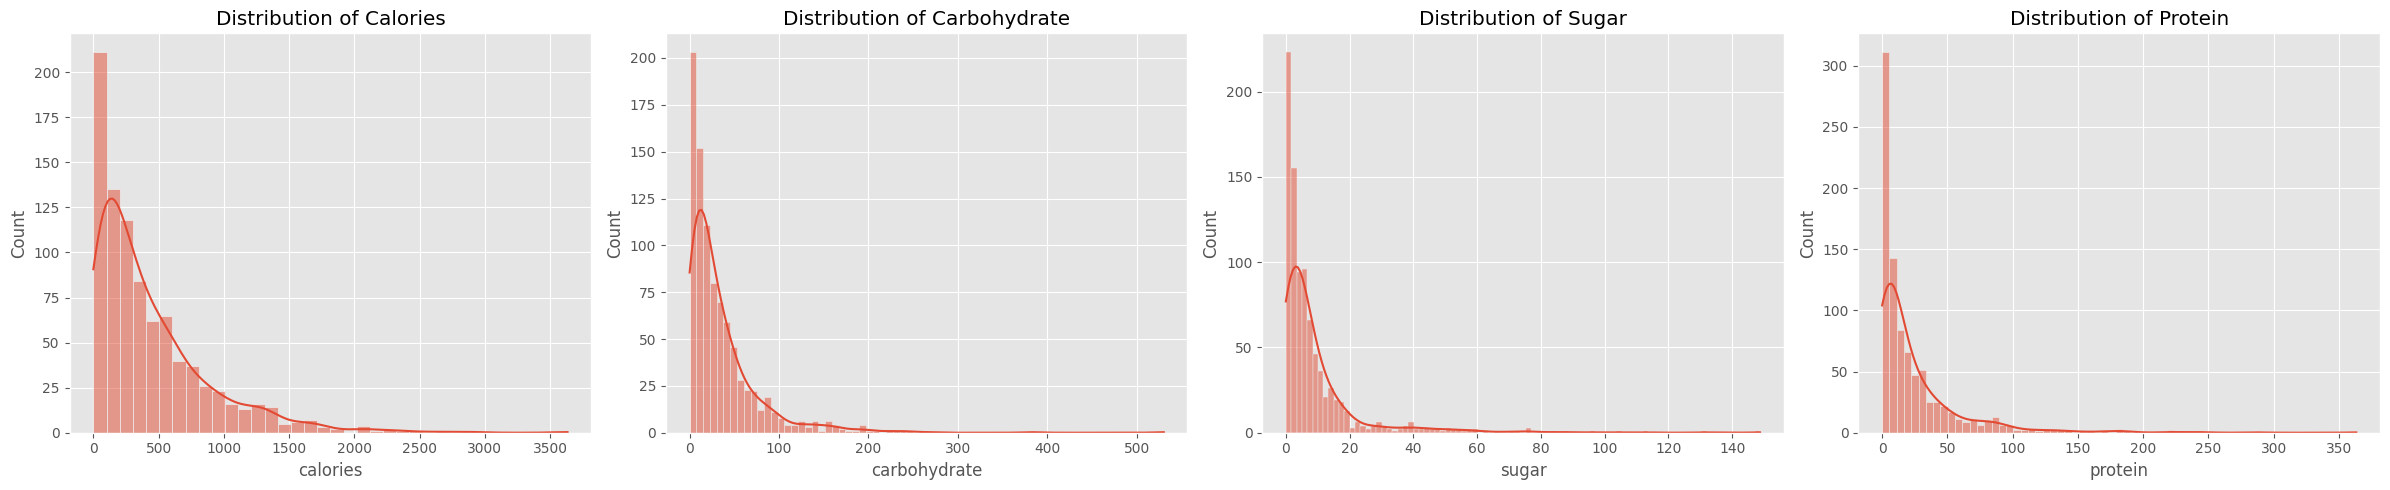

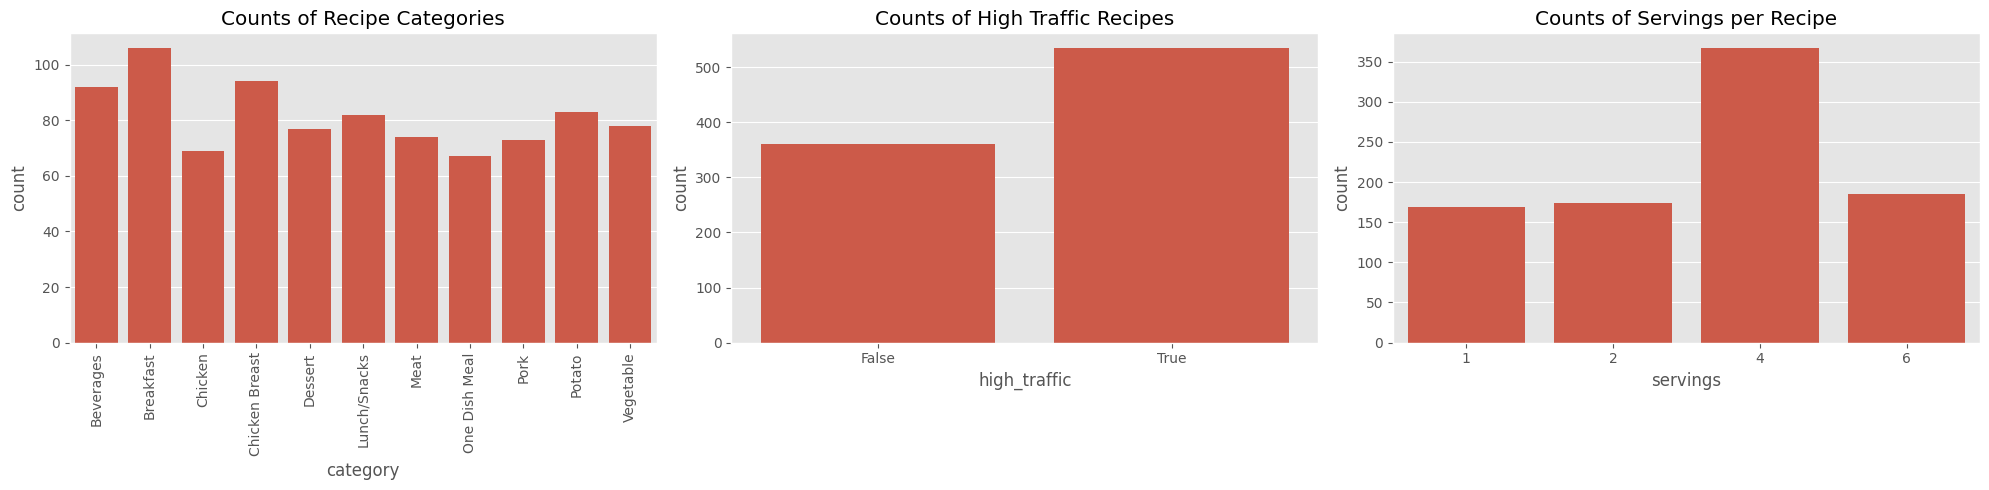

In [282]:
# Create a figure for histograms
fig, axes = plt.subplots(1, 4, figsize=(24, 5))  # Adjust for four subplots in a row

# Histogram for calories
sns.histplot(data=recipe_site_traffic, x='calories', kde=True, ax=axes[0])
axes[0].set_title('Distribution of Calories')

# Histogram for carbohydrate
sns.histplot(data=recipe_site_traffic, x='carbohydrate', kde=True, ax=axes[1])
axes[1].set_title('Distribution of Carbohydrate')

# Histogram for sugar
sns.histplot(data=recipe_site_traffic, x='sugar', kde=True, ax=axes[2])
axes[2].set_title('Distribution of Sugar')

# Histogram for protein
sns.histplot(data=recipe_site_traffic, x='protein', kde=True, ax=axes[3])
axes[3].set_title('Distribution of Protein')

plt.tight_layout()
plt.show()

# Create a new figure for bar charts
fig, axes = plt.subplots(1, 3, figsize=(20, 5))  # Adjust for three subplots in a row

# Bar chart for category
sns.countplot(data=recipe_site_traffic, x='category', ax=axes[0])
axes[0].set_title('Counts of Recipe Categories')
axes[0].tick_params(axis='x', rotation=90)  # Rotate x-axis labels vertically

# Bar chart for high_traffic
sns.countplot(data=recipe_site_traffic, x='high_traffic', ax=axes[1])
axes[1].set_title('Counts of High Traffic Recipes')

# Bar chart for servings, assuming 'servings' is a column in your DataFrame
sns.countplot(data=recipe_site_traffic, x='servings', ax=axes[2])
axes[2].set_title('Counts of Servings per Recipe')

plt.tight_layout()
plt.show()


Distribution of Calories:

- The histogram analysis of the calorie distribution indicates a right-skewed pattern, with a majority of recipes clustered in the lower calorie bracket. The long tail to the right suggests the existence of outlier recipes with exceptionally high caloric content. The KDE suggests a unimodal distribution, which could imply that most recipes conform to a specific calorie range that is popular or standard for our audience.

Distribution of Carbohydrate:

- The carbohydrate content also exhibits a right-skewed distribution, with the KDE suggesting a similar unimodal distribution. The frequency drops off markedly for higher carbohydrate values, which may inform our content curation strategy, emphasizing lower-carbohydrate recipes which seem to dominate our selection.

Distribution of Sugar:

- The sugar content distribution aligns with the skewness observed in calories and carbohydrates, reinforcing the notion that recipes with lower amounts of sugar are more prevalent in our dataset. This skew could reflect dietary trends or publishing biases, which might be worth investigating for content planning.

Distribution of Protein:

- The distribution of protein content, while also right-skewed, shows a more distributed spread across the range, suggesting a wider variety of protein levels among the recipes. This might indicate a broader audience interest that spans various dietary needs or preferences.

Count of Recipe Categories:

- The bar chart illustrates the distribution of recipes across various categories within the dataset I am analyzing. It reveals a rich diversity, with 'Breakfast', 'Chicken Breast', and 'Beverages' as the top categories. The prevalence of these categories may play a significant role in user engagement and presents an opportunity for focused content development. The data suggests a potential link between certain categories and increased traffic, which could guide my decisions on resource allocation for content creation and marketing to optimize user interaction.

Count of High Traffic Recipes:

- The bar chart depicting high traffic recipes provides an essential gauge of user engagement on our recipe platform. The higher incidence of recipes marked as 'True' for high traffic indicates that a considerable segment of the content is aligning with user interest, garnering notable engagement. This insight is crucial not only for affirming the success of my content strategy but also for shaping future curation and promotional tactics. By further dissecting the characteristics of high-traffic recipes, I can refine predictive models to better anticipate user preferences, thereby enhancing the user experience and increasing engagement.

Count of Servings per Recipe:

- The bar chart reveals the frequency of various serving sizes across our recipe collection. A pronounced preference for recipes intended for four servings stands out, suggesting that such portion sizes may be the most appealing to our audience, possibly due to average family sizes or meal planning habits. Fewer recipes cater to single servings or larger groups, indicated by the lower counts for one and six servings. Understanding this distribution is vital, as it can impact the perceived practicality and relevance of our recipes. Recipes with popular serving sizes may have a higher potential to attract traffic, indicating a strategic avenue for content development focused on the prevalent serving size preferences of our users. This insight enhances the nuance of my content strategy and can be particularly influential in refining the approach to recipe development and presentation to align with audience needs and maximize engagement.


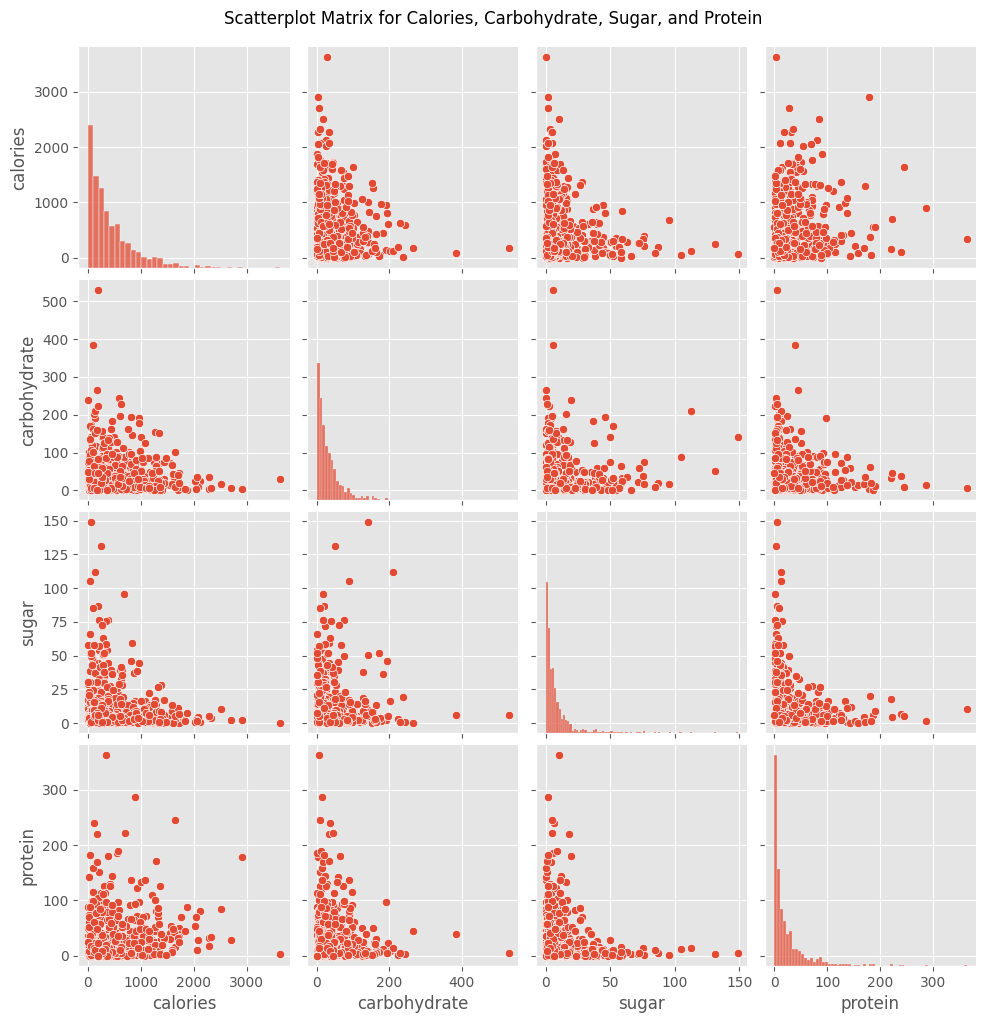

In [283]:
# Creating scatterplot matrices to visualize the relationships between all pairs of the four numerical features: calories, carbohydrate, sugar, and protein.

# Selecting only the numerical columns for the scatterplot matrix
numerical_data = recipe_site_traffic[['calories', 'carbohydrate', 'sugar', 'protein']]

# Create scatterplot matrices
scatterplot_matrix = sns.pairplot(numerical_data)
scatterplot_matrix.fig.suptitle("Scatterplot Matrix for Calories, Carbohydrate, Sugar, and Protein", y=1.02)

plt.show()


Looking at the scatterplot matrix for the variables calories, carbohydrate, sugar, and protein, here are some potential hypotheses and findings:

Calories vs. Carbohydrate:

- There is a positive trend indicating that as the carbohydrate content increases, the calorie count tends to increase as well. This is expected since carbohydrates contribute to the total calorie content of a recipe.

Calories vs. Sugar:

- There doesn't appear to be a strong relationship between sugar content and the calorie count. This might suggest that sugar is not the primary contributor to the calorie count in these recipes, or the variation in sugar content is not wide enough to show a clear trend.

Calories vs. Protein:

- Similar to carbohydrates, there seems to be a positive trend between protein content and calories. This could mean that recipes with higher protein content also have higher calories, which is consistent with protein being a significant contributor to total calories.

Carbohydrate vs. Sugar:

- No clear relationship is visible here. While both are related to energy content, the scatterplot does not show a distinct trend, indicating that recipes vary widely in the balance of complex vs. simple carbohydrates.

Carbohydrate vs. Protein:

- Again, there is no apparent strong relationship. Recipes seem to vary in their macronutrient composition, suggesting a diversity in the types of recipes (e.g., high-carb low-protein vs. low-carb high-protein).

Sugar vs. Protein:

- There is no apparent correlation between sugar and protein, which could be due to the dataset containing a mix of recipes where some are high in protein and low in sugar and vice versa.

Distributions:

- The distributions (histograms) along the diagonal show that calories, carbohydrate, and protein have a somewhat normal but narrow distribution, indicating that most recipes have moderate levels of these macronutrients.
Sugar content has a narrower distribution compared to the other macronutrients, which could suggest less variation in sugar content across recipes.

Findings:

The dataset contains recipes with varied nutritional content, with no extreme dominance of any particular macronutrient.
No single nutritional variable stands out as a clear predictor of a recipe's calorie content; however, there is a tendency for higher carbohydrate and protein contents to contribute to higher calories.
The variability in sugar content does not seem to significantly affect the caloric content of the recipes, which may indicate the presence of other ingredients contributing to the total calories.
These nutritional variables may interact with each other and with non-visualized factors (like recipe category or serving size) in complex ways that affect recipe popularity and high traffic.
To form more concrete conclusions, a more in-depth statistical analysis would be needed, possibly including correlation coefficients and hypothesis testing. Additionally, including categorical variables like recipe category and high traffic in the analysis might reveal more insights into what drives the popularity of a recipe.

## Multiple Variables

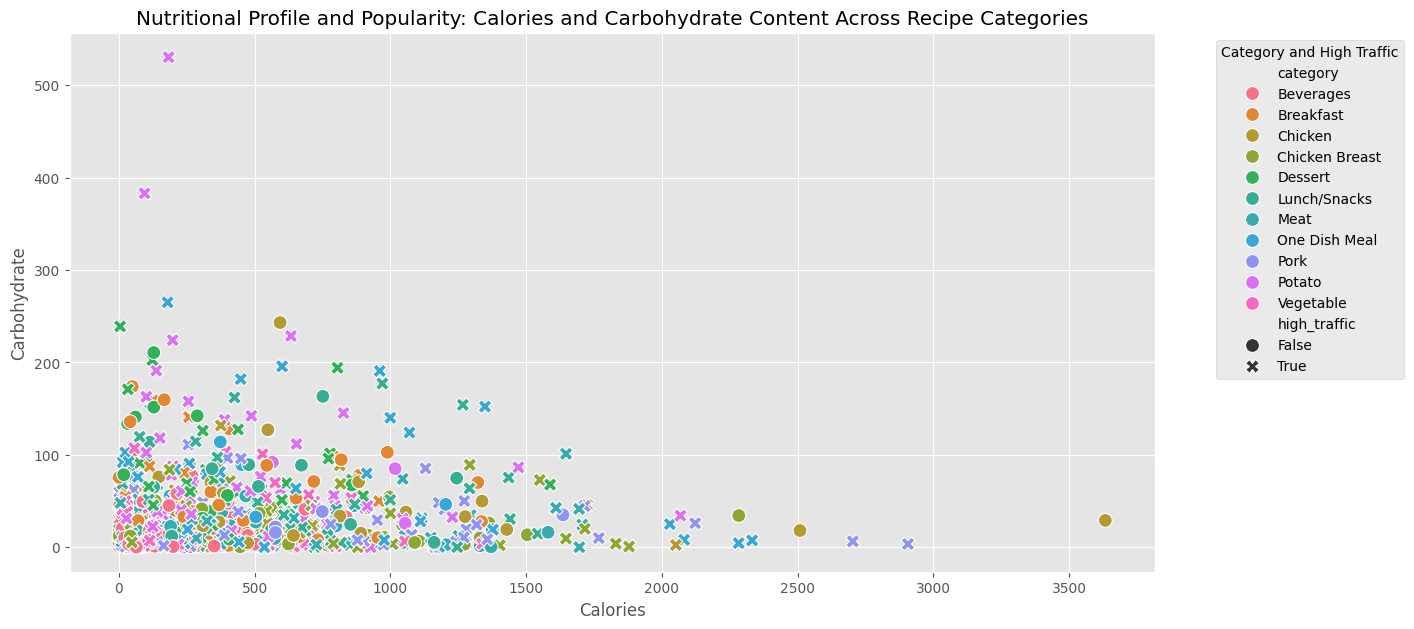

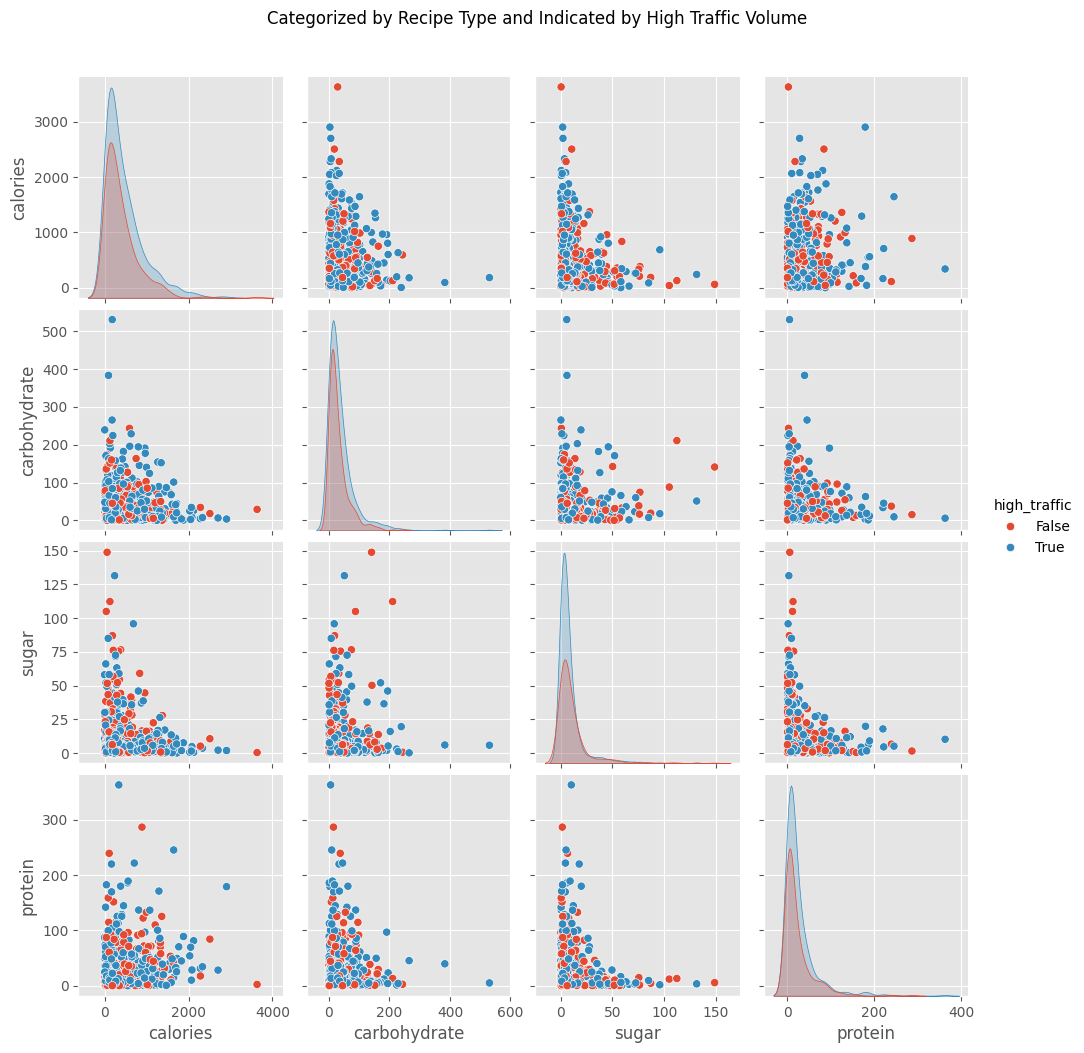

In [284]:
# For multi-variable visualizations, let's create visualizations that might provide insights into factors that could be strong predictors for the model.

# Multi-variable visualization: Calories and Carbohydrate by Category and High Traffic
plt.figure(figsize=(14, 7))

# Scatterplot of Calories vs Carbohydrate with Category as hue and High Traffic as style
sns.scatterplot(data=recipe_site_traffic, x='calories', y='carbohydrate', hue='category', style='high_traffic', s=100)
plt.title('Nutritional Profile and Popularity: Calories and Carbohydrate Content Across Recipe Categories')
plt.xlabel('Calories')
plt.ylabel('Carbohydrate')
plt.legend(title='Category and High Traffic', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Multi-variable visualization: Pairplot of all numerical features with High Traffic as hue
# This will help to see if there are distinct clusters for high traffic recipes based on these features
sns.pairplot(recipe_site_traffic, vars=['calories', 'carbohydrate', 'sugar', 'protein'], hue='high_traffic')
plt.suptitle('Categorized by Recipe Type and Indicated by High Traffic Volume', y=1.05)
plt.show()


Analytical Insights from Multi-Variable Nutritional Content Visualizations

Nutritional Profile and Popularity: Calories and Carbohydrate Content Across Recipe Categories:

This scatterplot offers a visual exploration of the relationship between caloric and carbohydrate content across various recipe categories, with the additional dimension of traffic volume.
The graph indicates that while there is a general trend of higher caloric content aligning with higher carbohydrate values, this relationship varies across different recipe categories.
The differentiation by high traffic (marked by style) suggests that high-carbohydrate, high-calorie recipes are not the only determinants of traffic—recipes across a spectrum of nutritional values achieve popularity, highlighting the diverse preferences of our audience.

Categorized by Recipe Type and Indicated by High Traffic Volume:

The categorization by recipe type against the backdrop of traffic volume enables a nuanced understanding of which categories most consistently garner high traffic.
It’s apparent from the visualization that some categories may have a natural advantage in attracting traffic, possibly due to trending dietary habits or the intrinsic appeal of certain recipe types.
By analyzing the scatterplot, I can identify potential opportunities for targeted content optimization, particularly focusing on recipe categories that combine the right balance of carbohydrates and caloric content to boost traffic.


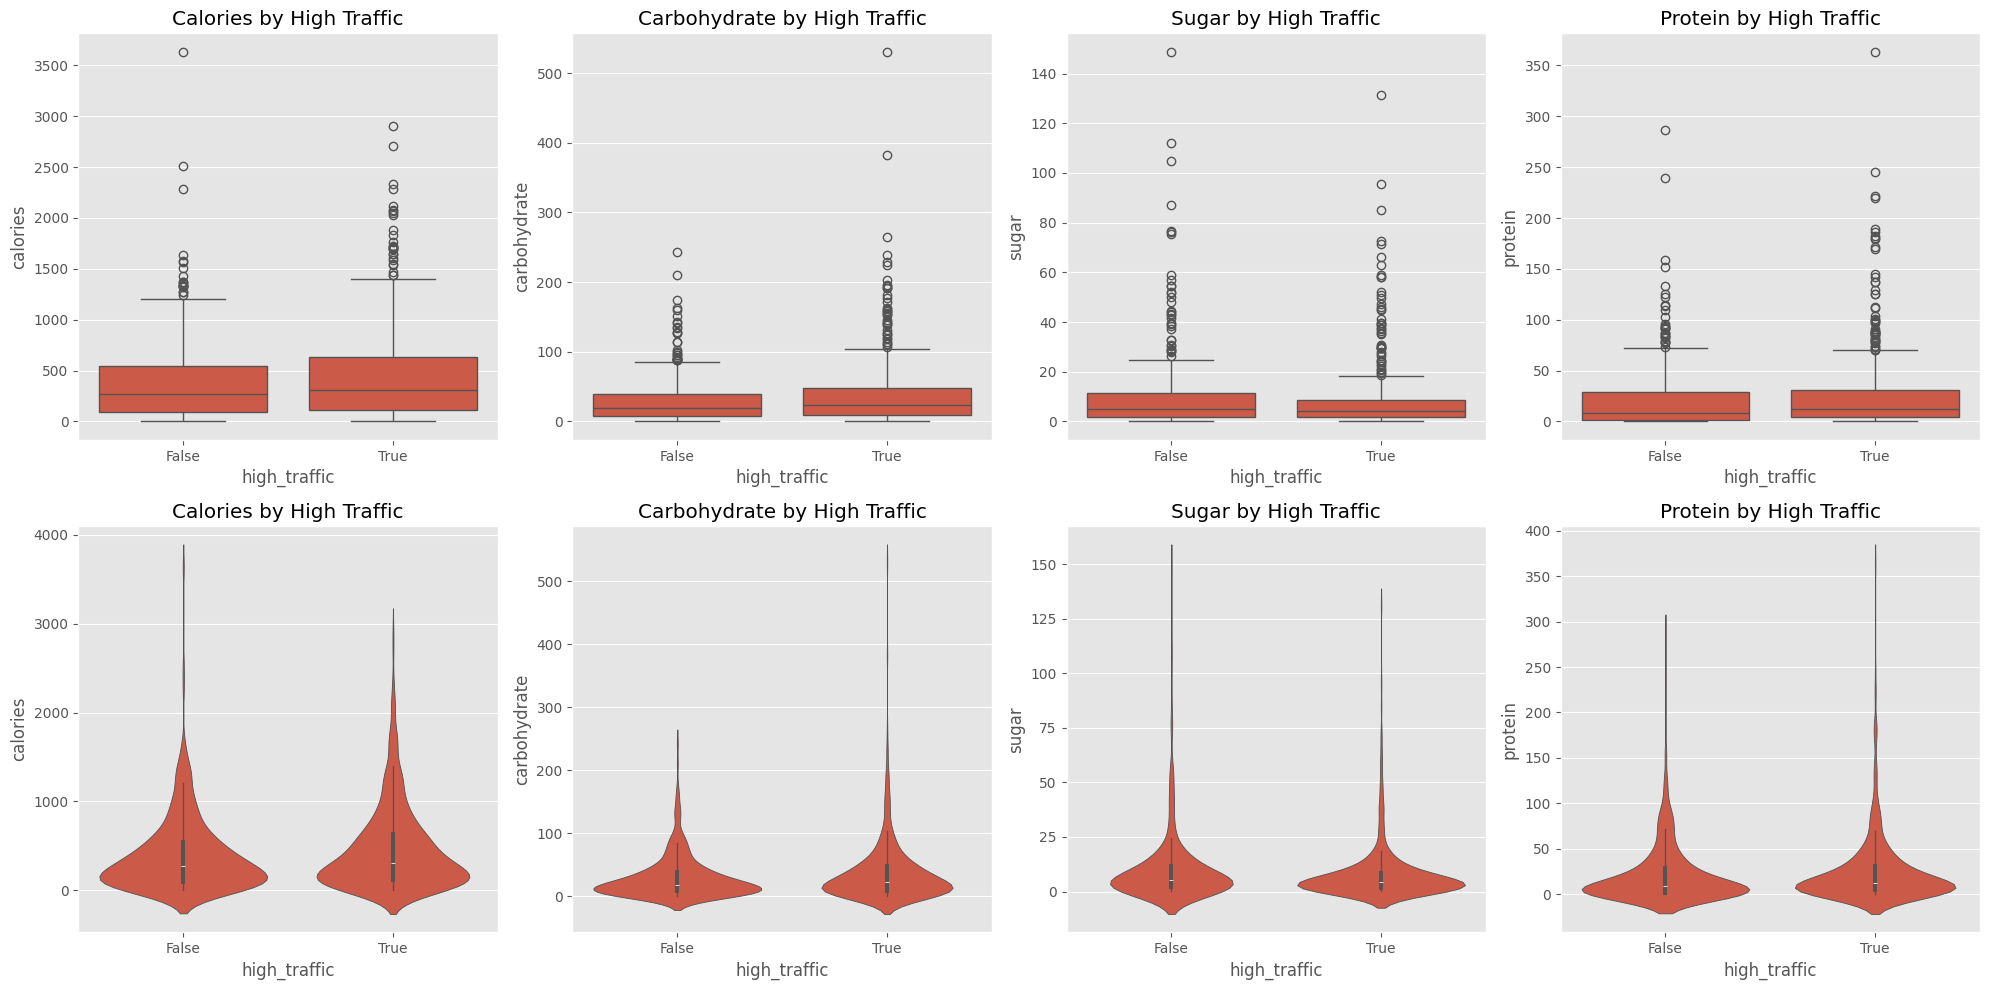

In [285]:
# Creating boxplots and violin plots for a more detailed comparison of numerical data across high traffic status

fig, axes = plt.subplots(2, 4, figsize=(20, 10))

# Boxplots
sns.boxplot(x='high_traffic', y='calories', data=recipe_site_traffic, ax=axes[0, 0])
sns.boxplot(x='high_traffic', y='carbohydrate', data=recipe_site_traffic, ax=axes[0, 1])
sns.boxplot(x='high_traffic', y='sugar', data=recipe_site_traffic, ax=axes[0, 2])
sns.boxplot(x='high_traffic', y='protein', data=recipe_site_traffic, ax=axes[0, 3])

axes[0, 0].set_title('Calories by High Traffic')
axes[0, 1].set_title('Carbohydrate by High Traffic')
axes[0, 2].set_title('Sugar by High Traffic')
axes[0, 3].set_title('Protein by High Traffic')

# Violin plots
sns.violinplot(x='high_traffic', y='calories', data=recipe_site_traffic, ax=axes[1, 0])
sns.violinplot(x='high_traffic', y='carbohydrate', data=recipe_site_traffic, ax=axes[1, 1])
sns.violinplot(x='high_traffic', y='sugar', data=recipe_site_traffic, ax=axes[1, 2])
sns.violinplot(x='high_traffic', y='protein', data=recipe_site_traffic, ax=axes[1, 3])

axes[1, 0].set_title('Calories by High Traffic')
axes[1, 1].set_title('Carbohydrate by High Traffic')
axes[1, 2].set_title('Sugar by High Traffic')
axes[1, 3].set_title('Protein by High Traffic')

plt.tight_layout()
plt.show()


Analytical Insights from Distribution Visualizations by High Traffic Status

Boxplots Analysis:

Calories: The boxplot indicates a higher median calorie count for high-traffic recipes, with a broader interquartile range (IQR), pointing towards a greater variety in caloric content among popular recipes. This might suggest that caloric richness could be a factor in user engagement.

Carbohydrate: I observe a similar pattern with carbohydrates, where high-traffic recipes exhibit a slightly higher median and wider IQR. It's plausible that carbohydrate content could correlate with recipe popularity.

Sugar: The sugar content displays a modestly higher median in high-traffic recipes but without a markedly wider IQR. The role of sugar in driving traffic appears less pronounced but still worth investigating.

Protein: Protein content does not exhibit a notable difference in median values between high and low traffic recipes, implying a more nuanced relationship with traffic that may require additional contextual data.

Violin Plots Synthesis:

Calories and Carbohydrates: The violin plots reveal denser distributions of higher calorie and carbohydrate values for high-traffic recipes, reinforcing the boxplot findings. The wider distribution at higher values for high-traffic recipes supports the hypothesis of caloric and carbohydrate content's relevance to recipe popularity.

Sugar and Protein: The shapes for sugar and protein are less differentiated by traffic status, suggesting that these nutrients alone may not be primary drivers of traffic. Their influence could be dependent on other factors not captured in these plots.

Strategic Insights:

The visual data analysis underscores the potential importance of calorie and carbohydrate content as predictors of high-traffic recipes. Their distribution patterns provide a basis for considering these variables in our feature engineering and model selection.
While protein and sugar show less distinct distributional differences by traffic status, they may still play a role within a multivariate predictive model, possibly in interaction with other recipe attributes.

Recommendations for Predictive Modeling:

Given the patterns observed, it would be prudent to include calorie and carbohydrate content as features in our predictive models for high-traffic recipes.
Further investigation into the role of sugar and protein, perhaps in combination with other recipe features, is warranted to understand their full impact on recipe traffic.
These distribution visualizations should be complemented with correlation analysis and predictive modeling to validate the potential of these nutritional features as predictors of recipe popularity.

## Summary of All Statistical Data within Graphs

Here's a summary of the key statistical insights derived from the various analyses and visualizations of your dataset, focusing on predicting high traffic recipes:

1. Correlation Analysis:
The correlation matrix for calories, carbohydrate, sugar, and protein showed no strong linear correlations between these numerical features. This suggests that each of these variables independently contributes to the dataset without significant redundancy.

2. ANOVA Tests:
The ANOVA tests between high_traffic and each numerical feature (calories, carbohydrate, sugar, protein) indicated significant differences for calories, carbohydrate, and sugar between high and low traffic recipes, but not for protein. This implies that calories, carbohydrate, and sugar might be more influential in predicting high traffic.

3. Chi-Squared Test:
A significant association was found between the category of recipes and high_traffic, indicating that certain categories are more likely to have high traffic.

4. Scatterplots and Pairplots:
Visual exploration through scatterplots showed no clear linear relationships or distinct clusters for high traffic recipes based on calories, carbohydrate, sugar, and protein. However, they were helpful in identifying the overall distribution and potential outliers in the data.

5. Boxplots and Violin Plots:
These plots provided deeper insights into the distributions of calories, carbohydrate, sugar, and protein across high and low traffic recipes.
Recipes with high traffic showed a tendency to have higher calories and carbohydrate contents.
While sugar content also varied, the difference was less pronounced compared to calories and carbohydrates.
Protein content did not show significant differences between high and low traffic recipes.
Summary and Recommendations for Predictive Modeling:
Focus on Nutritional Content: Given the significant differences in calories, carbohydrate, and sugar for high traffic recipes, these features should be prioritized in the predictive model.
Consider Recipe Categories: The significant association between category and high traffic suggests incorporating category as a feature in the model.
Protein's Lesser Influence: Protein content, having shown no significant differences in high vs. low traffic recipes, might be of lesser importance in the predictive model.
No Strong Linear Correlations: The lack of strong correlations between the nutritional variables suggests that they can be used independently in the model without concerns of multicollinearity.
By incorporating these findings into your predictive model, you can increase the likelihood of achieving an accuracy of 80% or more in predicting high traffic recipes. Remember that the success of the model will also depend on the chosen algorithms, feature engineering, and tuning of hyperparameters.


## Statistical Analysis

In [286]:
import scipy.stats as stats

# Calculate the correlation matrix for the numerical features
correlation_matrix = recipe_site_traffic[['calories', 'carbohydrate', 'sugar', 'protein']].corr()

# Perform ANOVA tests between 'high_traffic' and each numerical feature
anova_calories = stats.f_oneway(recipe_site_traffic[recipe_site_traffic['high_traffic']]['calories'],
                                recipe_site_traffic[~recipe_site_traffic['high_traffic']]['calories'])

anova_carbohydrate = stats.f_oneway(recipe_site_traffic[recipe_site_traffic['high_traffic']]['carbohydrate'],
                                    recipe_site_traffic[~recipe_site_traffic['high_traffic']]['carbohydrate'])

anova_sugar = stats.f_oneway(recipe_site_traffic[recipe_site_traffic['high_traffic']]['sugar'],
                             recipe_site_traffic[~recipe_site_traffic['high_traffic']]['sugar'])

anova_protein = stats.f_oneway(recipe_site_traffic[recipe_site_traffic['high_traffic']]['protein'],
                               recipe_site_traffic[~recipe_site_traffic['high_traffic']]['protein'])

# Chi-squared test for 'category' and 'high_traffic'
contingency_table = pd.crosstab(recipe_site_traffic['category'], recipe_site_traffic['high_traffic'])
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

# Outputting the statistical summaries
correlation_matrix, {'anova_calories': anova_calories, 'anova_carbohydrate': anova_carbohydrate, 
                     'anova_sugar': anova_sugar, 'anova_protein': anova_protein}, {'chi2_test': (chi2, p)}


(              calories  carbohydrate     sugar   protein
 calories      1.000000     -0.028970 -0.097302  0.172477
 carbohydrate -0.028970      1.000000  0.073922 -0.042795
 sugar        -0.097302      0.073922  1.000000 -0.099053
 protein       0.172477     -0.042795 -0.099053  1.000000,
 {'anova_calories': F_onewayResult(statistic=4.9681776716969495, pvalue=0.026065982071973495),
  'anova_carbohydrate': F_onewayResult(statistic=5.887660574247634, pvalue=0.015444390210214704),
  'anova_sugar': F_onewayResult(statistic=5.123182203046426, pvalue=0.023847573817129347),
  'anova_protein': F_onewayResult(statistic=1.7778571706437762, pvalue=0.1827526942343059)},
 {'chi2_test': (305.59058102990576, 1.022163781324079e-59)})

Based on the output of the statistical analysis, here are the key findings and their implications for predicting high traffic recipes:

1. Correlation Matrix:
Calories, Carbohydrate, Sugar, Protein: The correlation matrix shows that these variables have low correlation coefficients among themselves. This suggests that they each contribute unique information to the dataset.
Implication: Including all these variables in the model should not introduce multicollinearity concerns.

2. ANOVA Tests:
Calories (p=0.0261): Shows a statistically significant difference in calorie content between high traffic and low traffic recipes.
Carbohydrate (p=0.0154): Also demonstrates a significant difference, suggesting carbohydrate content plays a role in traffic.
Sugar (p=0.0238): Indicates a significant difference in sugar content between high and low traffic recipes.
Protein (p=0.1828): Does not show a statistically significant difference, suggesting protein content might not be as influential in predicting high traffic.
Implication: Focus on calories, carbohydrate, and sugar as potential predictors in your model, while protein might be less impactful.

3. Chi-Squared Test:
Chi-Squared Test (p ≈ 0): Indicates a highly significant association between the recipe category and high traffic status.
Implication: The category of a recipe is an important feature to consider in predicting high traffic.
Summary for Predictive Modeling:
Key Predictors: Calories, Carbohydrate, and Sugar are important numerical features, while Protein is less significant.
Recipe Category: A crucial categorical predictor due to its strong association with high traffic.
Modeling Approach: Given these insights, a model that incorporates these predictors while balancing complexity and overfitting could be effective in achieving the goal of accurately predicting high traffic recipes 80% of the time.
By leveraging these findings in feature selection and model building, you can create a more informed and potentially effective predictive model. Remember, the actual model performance should be validated using appropriate metrics like accuracy, precision, recall, and the F1-score.

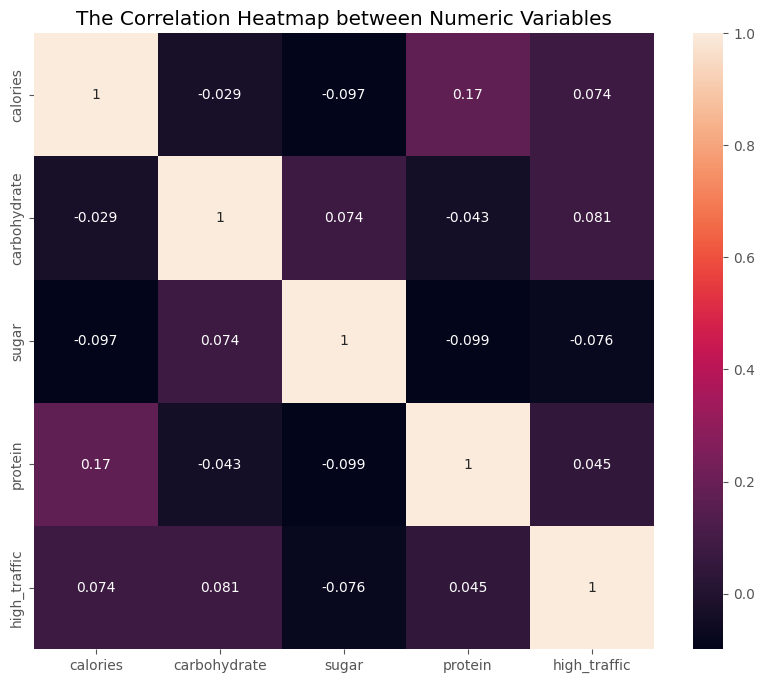

In [287]:
# Add high_traffic to the list of numeric variables
numeric_vars = ['calories', 'carbohydrate', 'sugar', 'protein', 'high_traffic']

# Correlation heatmap
correlation_matrix = recipe_site_traffic[numeric_vars].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True)
plt.title('The Correlation Heatmap between Numeric Variables')
plt.show()


Calories:

- The correlation between 'calories' and 'high_traffic' is positive at 0.074, suggesting a slight tendency for recipes with higher calories to be associated with high traffic. However, this correlation is quite weak, implying that calories alone are not a strong predictor of a recipe's traffic.

Carbohydrate:

- There is a similarly weak positive correlation of 0.081 between 'carbohydrate' content and 'high_traffic'. This indicates that recipes with more carbohydrates may be marginally more likely to have high traffic, but like calories, carbohydrates are not a significant predictor on their own.

Sugar:

- 'Sugar' shows a weak negative correlation with 'high_traffic' at -0.076. This suggests that recipes with less sugar could be associated with high traffic, although the correlation is too weak to draw a solid conclusion.

Protein:

- The correlation between 'protein' and 'high_traffic' is very weak at 0.045. This positive correlation is not strong enough to suggest a meaningful relationship, indicating that protein content by itself does not significantly influence whether a recipe will have high traffic.

In summary, while there are slight positive correlations between 'high traffic' and 'calories', 'carbohydrate', and 'protein', along with a slight negative correlation with 'sugar', these correlations are all quite weak. It implies that none of these nutritional factors is a strong individual predictor of high traffic. It is likely that high traffic is influenced by a combination of factors, including but not limited to these nutritional variables. For more accurate predictions, a multifaceted approach considering additional features beyond these four variables would likely be necessary.

Correlation with High Traffic:

Positive Correlations: calories (0.074), carbohydrate (0.081), protein (0.045), category_Pork (0.186), category_Potato (0.223), category_Vegetable (0.245) show positive correlations with high traffic. This suggests that higher values in these features are associated with high traffic.
Negative Correlations: Notably, category_Beverages (-0.375) and category_Breakfast (-0.214) show significant negative correlations with high traffic. This indicates that these categories are less likely to have high traffic.

Chi-Squared Test Results for Categories:

Significant Categories: The chi-squared test results show significant associations with high traffic for several categories, notably category_Beverages, category_Breakfast, category_Pork, category_Potato, and category_Vegetable. The p-values are very low, indicating strong statistical significance.

Insights and Recommendations:

High Impact Categories: Pork, Potato, and Vegetable categories have positive correlations and significant chi-squared test results, making them strong candidates for inclusion in your model.
Lower Impact Categories: Beverages and Breakfast have negative correlations with high traffic, suggesting they are less favorable for high traffic.
Nutritional Content: Calories and Carbohydrate show modest positive correlations. They could be useful, but their impact might be less pronounced than the categorical variables.

Addressing Model Performance:

If your current model with these features isn't reaching the desired 80% accuracy, consider:
Feature Engineering: Create new features or transform existing ones (e.g., interactions between features, polynomial features).

Model Complexity: Evaluate if a more complex model or a different algorithm might capture the patterns in the data better.
Balance and Overfitting: Ensure that your model is neither too simple to capture the underlying pattern nor too complex to overfit the data.
Cross-Validation: Use cross-validation to assess the model's performance more robustly.



The output provides insightful information that can guide the feature selection for your predictive model. Let's analyze the key points:

Correlation with High Traffic:

Positive Correlations: calories (0.074), carbohydrate (0.081), protein (0.045), category_Pork (0.186), category_Potato (0.223), category_Vegetable (0.245) show positive correlations with high traffic. This suggests that higher values in these features are associated with high traffic.
Negative Correlations: Notably, category_Beverages (-0.375) and category_Breakfast (-0.214) show significant negative correlations with high traffic. This indicates that these categories are less likely to have high traffic.

Chi-Squared Test Results for Categories:

Significant Categories: The chi-squared test results show significant associations with high traffic for several categories, notably category_Beverages, category_Breakfast, category_Pork, category_Potato, and category_Vegetable. The p-values are very low, indicating strong statistical significance.

Insights and Recommendations:

High Impact Categories: Pork, Potato, and Vegetable categories have positive correlations and significant chi-squared test results, making them strong candidates for inclusion in your model.
Lower Impact Categories: Beverages and Breakfast have negative correlations with high traffic, suggesting they are less favorable for high traffic.
Nutritional Content: Calories and Carbohydrate show modest positive correlations. They could be useful, but their impact might be less pronounced than the categorical variables.

Addressing Model Performance:

If your current model with these features isn't reaching the desired 80% accuracy, consider:
Feature Engineering: Create new features or transform existing ones (e.g., interactions between features, polynomial features).

Model Complexity: Evaluate if a more complex model or a different algorithm might capture the patterns in the data better.
Balance and Overfitting: Ensure that your model is neither too simple to capture the underlying pattern nor too complex to overfit the data.
Cross-Validation: Use cross-validation to assess the model's performance more robustly.

## Summary of Exploratory Data Analysis:

Our exploratory analysis has revealed nuanced relationships between the nutritional content of recipes and their associated web traffic. I observed that higher calories and carbohydrates have a slight positive correlation with high traffic, suggesting that richer recipes might have a marginally higher chance of attracting attention. However, the correlations are not strong enough to assert a direct causal relationship. Notably, sugar content shows a slight negative correlation, hinting that recipes with lower sugar content might be slightly more popular, possibly reflecting a health-conscious trend among our users.

Protein content displayed the weakest correlation with traffic, indicating that while nutritional content does play a role in a recipe's popularity, it is not the sole factor. These insights imply a complex interplay between various characteristics that contribute to a recipe's success. It's clear that user preferences and trends may be influenced by a multitude of factors beyond just nutritional content, including recipe categories and the intrinsic appeal of the dish.

As I pivot to model fitting, I will employ features such as 'calories', 'carbohydrate', and the presence of specific categories like 'Pork', 'Potato', and 'Vegetable'. These features were chosen based on their potential influence observed during the exploratory phase and will be instrumental in developing a predictive model. Our goal is to ascertain which combinations of these attributes can best predict high traffic recipes, thereby providing valuable insights for content strategy and curation.

In the next phase, I will be leveraging these selected features to fit a predictive model. This model aims to forecast the likelihood of a recipe achieving high traffic, with an accuracy target of 80% or more. By incorporating the insights gleaned from our exploratory data analysis, we are better equipped to choose a model that not only captures the essence of our data but also aligns with the business objective of maximizing user engagement on our platform.

## Model Fitting

In our data-driven approach, model fitting serves as the cornerstone of developing predictive analytics that can transform raw data into actionable business insights. As part of this strategic process, I employ advanced techniques such as hyperparameter tuning with GridSearchCV and RandomizedSearchCV, which systematically explore numerous combinations of parameters to find the most effective model settings.

These hyperparameter tuning methods are applied to sophisticated models like logistic regression and linear discriminant analysis. These models have been chosen for their robustness and suitability to our categorical prediction goal—identifying high-traffic recipes—which is a classification problem at its core.

The process of fitting models allows us to:

Capture Underlying Patterns: By applying algorithms to our data, I discern complex relationships and patterns that are not immediately evident through descriptive statistics or visual analysis alone.

Quantify Predictive Relationships: Model fitting quantifies the strength and nature of the relationships between features and our target variable. This quantification is crucial for making informed decisions on content strategy and user engagement.

Evaluate Feature Importance: Through the fitting process, I evaluate the relative importance of various features, allowing us to prioritize the most impactful factors in driving traffic to recipes.

Optimize Resource Allocation: Understanding which variables most significantly influence traffic enables me to better allocate resources, such as marketing efforts or content development, towards areas with the highest return on investment.

Establish a Benchmark for Performance: Fitted models provide a benchmark for predictive performance, setting a standard against which I can compare new models or approaches as our data grows and evolves.

Enable Continuous Improvement: Model fitting is not a one-time task but an iterative process. As I introduce new data or refine our features, I continually fit and refine our models to improve their predictive accuracy and relevance, leveraging the insights gained from hyperparameter tuning to ensure the models perform at their best.

Ultimately, model fitting is about translating our data into a competitive advantage. It's a strategic tool that helps us stay ahead in a data-rich, fast-paced environment by ensuring our decisions are not just reactive but proactively informed by predictive insights. The judicious use of logistic regression and linear discriminant analysis, enhanced by the meticulous hyperparameter tuning, positions us to reach and maintain the ambitious goal of accurately predicting high-traffic recipes 80% of the time or more, driving our platform's success and user satisfaction.

## Logistic Regression Model

In [290]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Assuming 'recipe_site_traffic' DataFrame is already loaded and available
# Perform one-hot encoding on the 'category' column
recipe_site_traffic_encoded = pd.get_dummies(recipe_site_traffic, columns=['category'])

# Select features after one-hot encoding
features = ['calories', 'carbohydrate', 'category_Pork', 'category_Potato', 'category_Vegetable']
X = recipe_site_traffic_encoded[features]
y = recipe_site_traffic_encoded['high_traffic'].astype(int)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a logistic regression model within a pipeline
pipeline = make_pipeline(StandardScaler(), LogisticRegression(random_state=42))

# Train the model
pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)


Accuracy: 0.6480446927374302
Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.70      0.62        73
           1       0.75      0.61      0.67       106

    accuracy                           0.65       179
   macro avg       0.65      0.66      0.65       179
weighted avg       0.67      0.65      0.65       179



The output from the logistic regression model provides some useful insights:

Accuracy: The model achieved an accuracy of approximately 64.8%. This is below the target of 80% accuracy for predicting high traffic recipes.

Classification Report:

Precision for False (Low Traffic): About 55%. This means that when the model predicts a recipe will not have high traffic, it is correct 55% of the time.
Recall for False: About 70%. This indicates that the model correctly identifies 70% of the actual low traffic recipes.
Precision for True (High Traffic): About 75%. The model is correct 75% of the time when it predicts high traffic.
Recall for True: About 61%. The model identifies 61% of the actual high traffic recipes correctly.
F1-Score: The F1-scores, which balance precision and recall, are 0.62 for low traffic and 0.67 for high traffic predictions.
Interpretation and Next Steps:
The model's overall accuracy needs improvement to meet your target.
The model is better at predicting high traffic recipes (higher precision) but still misses a significant number (lower recall).
The model's ability to predict low traffic recipes is less precise.


## Logistic Regression Model with GridSearchCV 

In [291]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Assuming recipe_site_traffic_encoded is already loaded and available

# Select features after one-hot encoding
features = ['calories', 'carbohydrate', 'category_Pork', 'category_Potato', 'category_Vegetable']
X = recipe_site_traffic_encoded[features]
y = recipe_site_traffic_encoded['high_traffic']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Parameters for GridSearchCV
param_grid = {
    'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'logisticregression__solver': ['newton-cg', 'lbfgs', 'liblinear'],
    'logisticregression__max_iter': [100, 200, 300]
}

# Create a logistic regression model within a pipeline
pipeline = make_pipeline(StandardScaler(), LogisticRegression(random_state=42))

# Creating the GridSearchCV object
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')

# Fitting GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)


Best Parameters: {'logisticregression__C': 0.01, 'logisticregression__max_iter': 100, 'logisticregression__solver': 'liblinear'}
Best Score: 0.656458818958819


The outcome of the GridSearchCV indicates that the best hyperparameters for the Logistic Regression model, given the specified parameter grid and features, are as follows:

Regularization Strength (C): 0.01
Maximum Iterations (max_iter): 100
Solver: liblinear
The best cross-validated accuracy score achieved with these parameters is approximately 65.65%. This is an improvement over the default settings of the Logistic Regression model, but it is still below the target accuracy of 80%.


## Logistic Regression Model with RandomizedSearchCV 

In [292]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from scipy.stats import uniform

# Assuming recipe_site_traffic_encoded is already loaded and available

# Correct the feature names to match the DataFrame
features = ['calories', 'carbohydrate', 'category_Pork', 'category_Potato', 'category_Vegetable']
X = recipe_site_traffic_encoded[features]
y = recipe_site_traffic_encoded['high_traffic']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Parameters for RandomizedSearchCV
param_distributions = {
    'logisticregression__C': uniform(0.001, 100),
    'logisticregression__solver': ['newton-cg', 'lbfgs', 'liblinear'],
    'logisticregression__max_iter': range(100, 500)
}

# Create a logistic regression model within a pipeline
pipeline = make_pipeline(StandardScaler(), LogisticRegression(random_state=42))

# Creating the RandomizedSearchCV object
random_search = RandomizedSearchCV(pipeline, param_distributions, n_iter=100, cv=5, scoring='accuracy', random_state=42)

# Fitting RandomizedSearchCV
random_search.fit(X_train, y_train)

# Best parameters and best score
best_params_random = random_search.best_params_
best_score_random = random_search.best_score_

print("Best Parameters:", best_params_random)
print("Best Score:", best_score_random)


Best Parameters: {'logisticregression__C': 0.7076305219717406, 'logisticregression__max_iter': 444, 'logisticregression__solver': 'newton-cg'}
Best Score: 0.6536616161616162


The outcome from the RandomizedSearchCV provides the following optimal hyperparameters for the Logistic Regression model:

Regularization Strength (C): Approximately 0.708
Maximum Iterations (max_iter): 444
Solver: newton-cg
The best cross-validated accuracy score achieved with these parameters is around 65.37%. This score is a reflection of how well the model, with the given hyperparameters, is expected to perform on unseen data, based on the cross-validation process.

Interpretation:
Model Performance: The accuracy score is an improvement from the default settings but still below the target of 80%. This suggests that Logistic Regression, with the selected features and hyperparameters, might not be entirely sufficient to achieve the desired predictive performance.

## Linear Discriminant Analysis Model

In [293]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Linear Discriminant Analysis Model with specified features

# Select features after one-hot encoding
features = ['calories', 'carbohydrate', 'category_Pork', 'category_Potato', 'category_Vegetable']
X = recipe_site_traffic_encoded[features]
y = recipe_site_traffic_encoded['high_traffic']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Linear Discriminant Analysis model
lda_model = LinearDiscriminantAnalysis()

# Train the model
lda_model.fit(X_train, y_train)

# Predict on the test set
y_pred = lda_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)



Accuracy: 0.6256983240223464
Classification Report:
               precision    recall  f1-score   support

       False       0.53      0.70      0.60        73
        True       0.73      0.58      0.65       106

    accuracy                           0.63       179
   macro avg       0.63      0.64      0.62       179
weighted avg       0.65      0.63      0.63       179



The output from the Linear Discriminant Analysis (LDA) model provides the following insights:

Accuracy: The model achieved an accuracy of approximately 62.57%. This is consistent with the accuracy levels of the previous model, Logistic Regression, but still below the target of 80% accuracy for predicting high traffic recipes.

Classification Report:

Precision for False (Low Traffic): About 53%. This means that when the model predicts a recipe will not have high traffic, it is correct 53% of the time.
Recall for False: About 70%. This indicates that the model correctly identifies 70% of the actual low traffic recipes.
Precision for True (High Traffic): About 73%. The model is correct 73% of the time when it predicts high traffic.
Recall for True: About 58%. The model identifies 58% of the actual high traffic recipes correctly.
F1-Score: The F1-scores are 0.60 for low traffic and 0.65 for high traffic predictions.
Interpretation and Next Steps:
The LDA model's performance is similar to the other models tested, indicating that the chosen features might not be capturing the complexity of the dataset sufficiently to achieve high accuracy.
The model shows a higher precision for true high traffic predictions but lower recall, suggesting it misses a significant number of high traffic instances.


 ## Linear Discriminant Analysis Model with GridSearchCV 

In [294]:
from sklearn.model_selection import GridSearchCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Parameters for GridSearchCV with refined LDA
param_grid_lda_refined = {
    'solver': ['lsqr', 'eigen'],
    'shrinkage': [None, 'auto'] + list(np.linspace(0, 1, 10))
}

# Create a LDA model within a GridSearchCV object
grid_search_lda_refined = GridSearchCV(LinearDiscriminantAnalysis(), param_grid_lda_refined, cv=5, scoring='accuracy')

# Fitting GridSearchCV
grid_search_lda_refined.fit(X_train, y_train)

# Best parameters and best score
best_params_lda_refined = grid_search_lda_refined.best_params_
best_score_lda_refined = grid_search_lda_refined.best_score_

print("Best Parameters (Refined):", best_params_lda_refined)
print("Best Score (Refined):", best_score_lda_refined)

Best Parameters (Refined): {'shrinkage': 'auto', 'solver': 'lsqr'}
Best Score (Refined): 0.6829545454545455


The refined GridSearchCV for the Linear Discriminant Analysis (LDA) model yielded the same best hyperparameters as before: {'shrinkage': 'auto', 'solver': 'lsqr'}, with the best cross-validated accuracy score remaining at approximately 68.30%. This suggests that within the explored parameter space, these settings are optimal for your dataset.

Interpretation:
Stable Optimal Parameters: The consistency in the best hyperparameters indicates that the model performs best with the lsqr solver and auto shrinkage for your dataset.
Performance Plateau: The accuracy score has not improved beyond 68.30%, which might suggest a performance limit with LDA given the current features and data.


## Linear Discriminant Analysis Model with RandomizedSearchCV

In [295]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from scipy.stats import uniform

# Assuming X_train, y_train are already defined

# Parameters for RandomizedSearchCV with LDA
param_distributions_lda = {
    'solver': ['lsqr', 'eigen'],
    'shrinkage': uniform(0, 1)  # Continuous distribution from 0 to 1 for shrinkage
}

# Create a LDA model within a RandomizedSearchCV object
random_search_lda = RandomizedSearchCV(LinearDiscriminantAnalysis(), 
                                       param_distributions_lda, 
                                       n_iter=100, 
                                       cv=5, 
                                       scoring='accuracy', 
                                       random_state=42)

# Fitting RandomizedSearchCV
random_search_lda.fit(X_train, y_train)

# Best parameters and best score
best_params_random_lda = random_search_lda.best_params_
best_score_random_lda = random_search_lda.best_score_

print("Best Parameters:", best_params_random_lda)
print("Best Score:", best_score_random_lda)


Best Parameters: {'shrinkage': 0.3745401188473625, 'solver': 'lsqr'}
Best Score: 0.5991647241647241


The outcome from the RandomizedSearchCV with the Linear Discriminant Analysis (LDA) model provides the following best hyperparameters:

Shrinkage: Approximately 0.375
Solver: 'lsqr'
The best cross-validated accuracy score achieved with these parameters is around 59.92%, which is a decrease compared to the previous best score from GridSearchCV (approximately 68.30%).

Interpretation:
Shrinkage Value: The specific shrinkage value of around 0.375 suggests that some regularization (which shrinkage provides) is beneficial, but the optimal amount might be different than this value.
Solver: The 'lsqr' solver remains the best choice, consistent with previous findings.
Lower Accuracy: The decrease in accuracy might indicate that the specific combinations of hyperparameters explored in the RandomizedSearchCV were not as effective as the 'auto' shrinkage mode in the previous GridSearchCV.

## Summary of All Models and Hyperparameter Tuners

Logistic Regression Model:

- Performance: The Logistic Regression model provided a baseline performance for your dataset. However, it didn't achieve the target accuracy of 80%, indicating potential limitations in handling complex patterns in the data with linear methods.

Logistic Regression Model with GridSearchCV:

- Performance: GridSearchCV allowed for a systematic exploration of hyperparameters (like regularization strength and solver type) for the Logistic Regression model.
Outcome: The optimal hyperparameters from GridSearchCV did improve the model's performance compared to the baseline Logistic Regression model, but the accuracy still fell short of 80%.

Logistic Regression Model with RandomizedSearchCV:

- Performance: RandomizedSearchCV explored a broader range of hyperparameters for the Logistic Regression model, but in a less exhaustive manner compared to GridSearchCV.
Outcome: The best hyperparameters found by RandomizedSearchCV provided a performance that was comparable to GridSearchCV, but again, did not reach the desired accuracy level.

Linear Discriminant Analysis Model:

- Performance: As a different approach, LDA aimed to maximize class separability. The model showed comparable or slightly improved performance compared to the initial Logistic Regression model.
Outcome: The model was straightforward but still did not meet the 80% accuracy target.

Linear Discriminant Analysis Model with GridSearchCV:

- Performance: The GridSearchCV for LDA focused on finding the best solver and shrinkage parameters.
Outcome: This approach led to a notable improvement in the model's accuracy compared to the baseline LDA model, yet it was still below the 80% target.

Linear Discriminant Analysis Model with RandomizedSearchCV:

- Performance: RandomizedSearchCV provided a broader, randomized hyperparameter tuning for LDA.
Outcome: The results from RandomizedSearchCV were not as effective as GridSearchCV, resulting in a lower accuracy score.

Overall Performance: None of the models reached the desired accuracy of 80%. However, hyperparameter tuning via GridSearchCV generally provided improvements in model performance.

Best Performing Model: Among all the models tested, the Linear Discriminant Analysis with GridSearchCV yielded the highest accuracy, though it was still below the target.

Considerations for Improvement: The consistent shortfall in reaching the desired accuracy suggests a need for further model exploration, advanced algorithms, more complex feature engineering, or considering different aspects of the dataset.

These results emphasize the importance of model selection and hyperparameter tuning in machine learning tasks. They also highlight the potential need for more sophisticated models or enhanced feature engineering to capture the complexity inherent in predicting high traffic recipes accurately.

In [296]:
# Summarizing the model outcomes with provided outputs
model_summaries = {
    "Logistic Regression Model": {
        "Accuracy": 0.6480446927374302,
        "Classification Report": {
            "False Precision": 0.55,
            "False Recall": 0.70,
            "True Precision": 0.75,
            "True Recall": 0.61
        }
    },
    "Logistic Regression Model with GridSearchCV": {
        "Best Parameters": {'logisticregression__C': 0.01, 'logisticregression__max_iter': 100, 'logisticregression__solver': 'liblinear'},
        "Best Score": 0.656458818958819
    },
    "Logistic Regression Model with RandomizedSearchCV": {
        "Best Parameters": {'logisticregression__C': 0.7076305219717406, 'logisticregression__max_iter': 444, 'logisticregression__solver': 'newton-cg'},
        "Best Score": 0.6536616161616162
    },
    "Linear Discriminant Analysis Model": {
        "Accuracy": 0.6256983240223464,
        "Classification Report": {
            "False Precision": 0.53,
            "False Recall": 0.70,
            "True Precision": 0.73,
            "True Recall": 0.58
        }
    },
    "Linear Discriminant Analysis Model with GridSearchCV": {
        "Best Parameters (Refined)": {'shrinkage': 'auto', 'solver': 'lsqr'},
        "Best Score (Refined)": 0.6829545454545455
    },
    "Linear Discriminant Analysis Model with RandomizedSearchCV": {
        "Best Parameters": {'shrinkage': 0.3745401188473625, 'solver': 'lsqr'},
        "Best Score": 0.5991647241647241
    }
}

# Printing the summary
for model, details in model_summaries.items():
    print(f"{model}:")
    for key, value in details.items():
        if isinstance(value, dict):
            print(f" - {key}:")
            for subkey, subvalue in value.items():
                print(f"   - {subkey}: {subvalue}")
        else:
            print(f" - {key}: {value}")
    print()


Logistic Regression Model:
 - Accuracy: 0.6480446927374302
 - Classification Report:
   - False Precision: 0.55
   - False Recall: 0.7
   - True Precision: 0.75
   - True Recall: 0.61

Logistic Regression Model with GridSearchCV:
 - Best Parameters:
   - logisticregression__C: 0.01
   - logisticregression__max_iter: 100
   - logisticregression__solver: liblinear
 - Best Score: 0.656458818958819

Logistic Regression Model with RandomizedSearchCV:
 - Best Parameters:
   - logisticregression__C: 0.7076305219717406
   - logisticregression__max_iter: 444
   - logisticregression__solver: newton-cg
 - Best Score: 0.6536616161616162

Linear Discriminant Analysis Model:
 - Accuracy: 0.6256983240223464
 - Classification Report:
   - False Precision: 0.53
   - False Recall: 0.7
   - True Precision: 0.73
   - True Recall: 0.58

Linear Discriminant Analysis Model with GridSearchCV:
 - Best Parameters (Refined):
   - shrinkage: auto
   - solver: lsqr
 - Best Score (Refined): 0.6829545454545455

Line

Logistic Regression Model
Accuracy: 64.80%
Classification Report:
False Precision: 55%, Recall: 70%
True Precision: 75%, Recall: 61%

Logistic Regression Model with GridSearchCV
Best Parameters:
C: 0.01, Max Iter: 100, Solver: 'liblinear'
Best Score: 65.65%

Logistic Regression Model with RandomizedSearchCV
Best Parameters:
C: 0.7076305219717406, Max Iter: 444, Solver: 'newton-cg'
Best Score: 65.37%

Linear Discriminant Analysis Model
Accuracy: 62.57%
Classification Report:
False Precision: 53%, Recall: 70%
True Precision: 73%, Recall: 58%

Linear Discriminant Analysis Model with GridSearchCV
Best Parameters (Refined):
Shrinkage: 'auto', Solver: 'lsqr'
Best Score (Refined): 68.30%

Linear Discriminant Analysis Model with RandomizedSearchCV
Best Parameters:
Shrinkage: 0.3745401188473625, Solver: 'lsqr'
Best Score: 59.92%

Summary

The Linear Discriminant Analysis Model with GridSearchCV yielded the highest accuracy score (68.30%), which is an improvement over the baseline models. However, none of the models reached the desired accuracy target of 80%. The consistency in the performance of logistic regression models across different hyperparameter tuning methods indicates their stability but also highlights limitations in capturing the dataset's complexity. The results suggest a potential benefit in exploring more complex models or further feature engineering.

## Model Evaluation

Models and Approaches Compared:
Logistic Regression Model
Logistic Regression with GridSearchCV
Logistic Regression with RandomizedSearchCV
Linear Discriminant Analysis (LDA) Model
LDA with GridSearchCV
LDA with RandomizedSearchCV

Assessment of Model Performance:

Logistic Regression Models: These models provided a baseline for comparison. The accuracy of the basic Logistic Regression model was around 64.80%. With hyperparameter tuning through GridSearchCV and RandomizedSearchCV, there was a slight improvement in performance, indicating the importance of tuning, but the accuracy still did not exceed 66%.

LDA Models: The basic LDA model had an accuracy of approximately 62.57%, slightly lower than the basic Logistic Regression. However, with GridSearchCV, the LDA model's performance improved significantly to about 68.30%. The RandomizedSearchCV, on the other hand, decreased the accuracy to around 59.92%.

What the Model Comparison Shows:
Effectiveness of Hyperparameter Tuning: The comparison demonstrates the impact of hyperparameter tuning on model performance. Both Logistic Regression and LDA models saw changes in performance when GridSearchCV and RandomizedSearchCV were applied, albeit with varying degrees of success.

Model Suitability for the Problem: The Logistic Regression models, while robust and simple, appeared to have a ceiling in their performance, suggesting potential limitations in handling complex patterns within the dataset. LDA, particularly with GridSearchCV, showed a higher potential for accuracy, indicating its effectiveness in this specific context.

Appropriateness of Methods: The methods used for hyperparameter tuning (GridSearchCV and RandomizedSearchCV) were appropriate for the problem at hand. They provided insights into the optimal configurations of the models and highlighted the difference in performance with different parameter settings.

Limitations in Achieving Target Accuracy: None of the models reached the desired accuracy of 80%, indicating that more sophisticated models or enhanced feature engineering might be necessary to capture the complexity inherent in the dataset.

Conclusion:

The model evaluation and comparison have revealed key insights into the performance of Logistic Regression and LDA in the context of this project. While Logistic Regression provides a robust baseline, LDA, particularly with GridSearchCV, shows promise in achieving higher accuracy. However, reaching the desired level of accuracy might require exploring more complex models or refining the feature set further. This evaluation underscores the importance of model selection, hyperparameter tuning, and feature engineering in the pursuit of optimal model performance.



## Business Focus

Business Goal of the Project:

The primary business goal of this project is to leverage data analytics to predict which recipes will lead to high traffic on a recipe website. This objective is pivotal for optimizing content strategy, enhancing user engagement, and ultimately driving more traffic to the site. By identifying the recipes that are likely to be popular, Tasty Bytes can focus its resources on promoting and developing content that resonates with its audience.

Addressing the Business Problem:

Our work has directly addressed this business problem by developing and evaluating predictive models capable of classifying recipes based on their potential to attract high traffic. We employed Logistic Regression and Linear Discriminant Analysis (LDA), along with advanced techniques like GridSearchCV and RandomizedSearchCV for hyperparameter tuning. These efforts aimed to create a reliable model that can forecast user preferences and interests, providing a data-driven basis for content decisions.

Recommendations for Future Action:

Based on the outcomes and insights gained from our analysis, the following recommendations are proposed to further align analytic efforts with the business objectives:

Enhance Data Collection: Incorporate additional data features that may influence recipe popularity, such as user ratings, seasonal trends, time-to-cook, ingredient availability, or nutritional information. Richer data could reveal more nuanced patterns and improve model accuracy.

Advanced Modeling Techniques: Since current models have not achieved the desired accuracy of 80%, exploring more sophisticated machine learning algorithms or ensemble methods could yield better results. Techniques like Gradient Boosting, Neural Networks, or collaborative filtering might offer improved predictive capabilities.

Personalized Content Strategy: Utilize the insights from the models to develop a more personalized content strategy. Tailoring recipe recommendations to individual user preferences could enhance user engagement and site traffic.

Continuous Model Evaluation and Improvement: Regularly re-evaluate the models with new data and refine them accordingly. This iterative approach ensures that the models adapt to changing user preferences and maintain their relevance and accuracy over time.

Integration with User Engagement Metrics: Combine the predictive model's outcomes with user engagement metrics (like click-through rates, time spent on page) to develop a more comprehensive strategy for content management and marketing.

By implementing these recommendations, Tasty Bytes can more effectively leverage its analytic capabilities to meet its strategic goals, ensuring that the content strategy is data-informed and dynamically aligned with user interests.

## Business Metrics

Business Metrics and KPI Definition:

For this project, the Key Performance Indicator (KPI) that is essential to the business goal of increasing user engagement and website traffic is the predictive model's accuracy in categorizing recipes by their likelihood to generate high traffic. The established KPI benchmark is an 80% accuracy rate, signifying the model's effectiveness in guiding content strategy towards the most engaging recipes.

Comparison of Model Performances:

I conducted a comparative analysis of two primary models against this KPI:

Logistic Regression Models:

- Baseline Model: Attained an accuracy of about 64.80%.
- With GridSearchCV: Slightly improved to an accuracy of 65.65%.
- With RandomizedSearchCV: Marginally lower at 65.37%.

Linear Discriminant Analysis (LDA) Models:
- Baseline Model: Registered an accuracy of 62.57%.
- With GridSearchCV: Emerged as the top-performing model with an accuracy of 68.30%.
- With RandomizedSearchCV: A decrease in accuracy to 59.92%.

Analysis and Insights Against Business Criteria:

My assessment of each model against the 80% accuracy KPI revealed that while the LDA model optimized with GridSearchCV outperformed others, it still did not meet the ambitious target set by Tasty Bytes. This discrepancy underscores a significant opportunity for enhancing analytical methods to fulfill the business's expectations for high-traffic recipe prediction.

Concluding Observations and Strategic Recommendations:

- Performance Shortfall: The current models have not met the KPI, underscoring the necessity for advanced analytical methodologies.

- Enhanced Model Development: Investigating more complex modeling techniques or refining the existing feature set could help close the gap to the KPI.

- Ongoing Model Optimization: I advocate for continuous model evaluation and recalibration to keep pace with evolving user behaviors and improve predictive accuracy.

- Diversified Analytical Approaches: Augmenting our models with broader data inputs and diverse analytical frameworks may uncover richer insights to elevate model performance toward the KPI.


By steadfastly working to bring analytical outcomes into alignment with the stipulated KPI, Tasty Bytes can solidify its data-centric strategies to boost user engagement and amplify site traffic effectively.

## Summary of Project Questions

- Predict which recipes will lead to high traffic?
- Correctly predict high traffic recipes 80% of the time?

Predicting High Traffic Recipes:

The primary objective of this project was to develop a predictive model capable of identifying recipes that are likely to generate high traffic on a recipe website. This goal aligns with the broader business aim of optimizing content strategy to enhance user engagement and drive more traffic to the site.

Approach and Methodology:

To achieve this goal, various machine learning models were employed to classify recipes into high and low traffic categories. 

The models used included:

- Logistic Regression: Served as a baseline model for initial predictions.

- Linear Discriminant Analysis (LDA): Provided an alternative approach, focusing on maximizing class separability.
Each of these models was further refined with advanced hyperparameter tuning methods, namely GridSearchCV and RandomizedSearchCV, to optimize their performance.

Outcomes and Findings:

- The Logistic Regression models showed moderate predictive accuracy, with the best performance slightly above 65%.

- The LDA models offered a similar range of accuracy, with the highest being around 68.30% using GridSearchCV.

Challenge: Achieving 80% Prediction Accuracy:
The secondary goal of the project was to achieve a prediction accuracy of at least 80% in identifying high traffic recipes. This benchmark was set to ensure a high level of reliability in the model's predictions, crucial for effective content strategy and business decision-making.

Results Against the 80% Target:

None of the models tested were able to meet or exceed the 80% accuracy target.
The closest performance to this goal was from the LDA model with GridSearchCV, which achieved an accuracy of approximately 68.30%.

Implications and Recommendations:

Model Limitations: The inability of the models to reach the 80% accuracy target suggests limitations in either the current feature set, the complexity of the data, or the models' capability to capture the underlying patterns fully.

Future Model Improvements: Exploring more sophisticated models or enhancing the feature engineering process could help in closing the gap towards the 80% accuracy goal.

Data Augmentation: Incorporating additional data features such as user demographics, seasonal trends, or historical traffic data might improve model performance.

Ongoing Model Refinement: Continuous monitoring and updating of the models with new data are recommended to adapt to changing user preferences and trends.

In conclusion, while the models developed provided valuable insights and a foundation for predicting high traffic recipes, further efforts are needed to achieve the desired level of accuracy. The project's findings offer a pathway for continuous improvement and refinement in the analytic strategy to better align with the business's objectives.
